In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import xarray as xr
# data = np.random.lognormal(sigma=6, size=(n,n))
# plt.pcolormesh(data, norm=colors.LogNorm())
# plt.colorbar()

In [2]:
vmin1 = 1.e-4
vmax1 = 1.e4
lev_exp1 = np.arange(np.log10(vmin1), np.log10(vmax1).max() + 1)
print(lev_exp1)
levs1 = np.power(10, lev_exp1)
print(levs1)

levs2 = levs1[1:-1]
print(levs2)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [3]:
n = len(levs1)*10
print(n)

data = np.zeros((n,n))
for i, lev in enumerate(levs1):
    j1 = i*10
    j2 = (i+1)*10
    data[j1:j2,:] = levs1[i]
    
print(data.min(), data.max())

90
0.0001 10000.0


# Numpy - pcolormesh vs contourf

Text(0.5, 1.0, 'contourf & levs2')

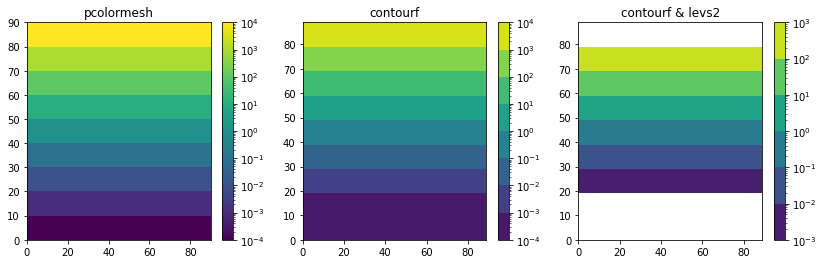

In [16]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
ax = axs[0]
p1 = ax.pcolormesh(data, norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]))
plt.colorbar(p1, ax=ax)
ax.set_title('pcolormesh')

# Repeated color on lower limit => shows only diff colors for values > 1e-3
ax = axs[1]
p1 = ax.contourf(data, levels=levs1, norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]))
plt.colorbar(p1, ax=ax)
ax.set_title('contourf')

# Mask ok upper limit (v > 1e-3)
# Mask lower limit (v < 1e-2)
ax = axs[2]
p1 = ax.contourf(data, levels=levs2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))
plt.colorbar(p1, ax=ax)
ax.set_title('contourf & levs2')

# DataArray.plot
DataArray.plot(levels=) behaves different than contourf

weird logic with levs1 and levs2


Text(0.5, 1.0, 'contourf & levs2')

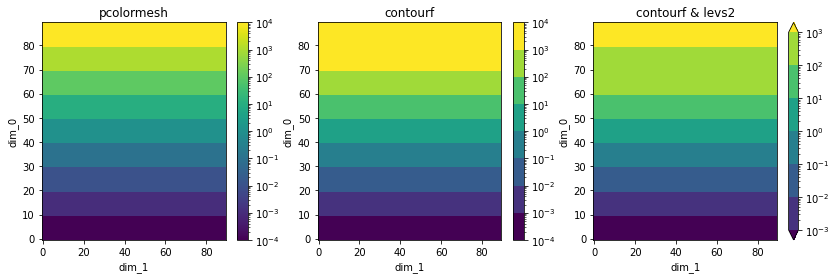

In [19]:
da = xr.DataArray(data)

fig, axs = plt.subplots(1,3, figsize=(14,4))
ax = axs[0]
da.plot(ax=ax, norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]))
ax.set_title('pcolormesh')

# Repeats color on upper limit => All values above v > 1e3 are same
ax = axs[1]
da.plot(ax=ax, levels=levs1, norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]))
ax.set_title('contourf')

# Repeats color on upper limit => Values 1e2 & 1e3 same cat, then yellow for v > 1e3
ax = axs[2]
da.plot(ax=ax, levels=levs2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))
ax.set_title('contourf & levs2')

fig.suptitle('DataArray - plot')

# DataArray - pcolormesh vs pcolormesh

DataArray.plot(levels=) differs from DataArray.plot.contourf(levels=)

DataArray.plot.contourf(levels=) still has repeated color but consistent with levs1 or levs2

Text(0.5, 0.98, 'DataArray - plot specific')

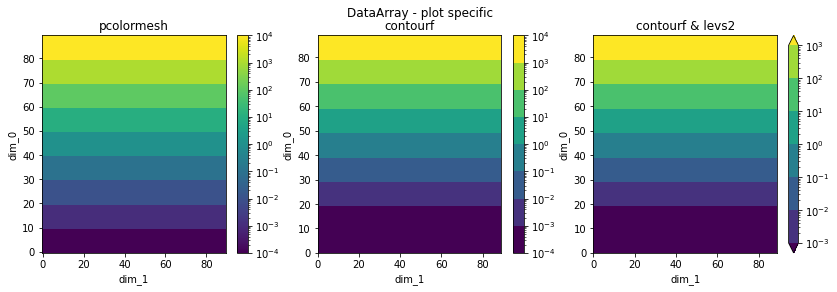

In [21]:
da = xr.DataArray(data)

fig, axs = plt.subplots(1,3, figsize=(14,4))
ax = axs[0]
da.plot.pcolormesh(ax=ax, norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]))
ax.set_title('pcolormesh')

ax = axs[1]
da.plot.contourf(ax=ax, levels=levs1, norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]))
ax.set_title('contourf')

ax = axs[2]
da.plot.contourf(ax=ax, levels=levs2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))
ax.set_title('contourf & levs2')

fig.suptitle('DataArray - plot specific')

# DataArray - contourf + colorbar extended with different colors

Conclusion: Need to set limits on LogNorm for consistent coloring of levels

In [30]:
# https://stackoverflow.com/questions/48613920/use-of-extend-in-a-pcolormesh-plot-with-discrete-colorbar

cmap_name = 'viridis'
cmap = plt.cm.get_cmap('viridis', len(levs2)+1)
colors = list(cmap(np.arange(len(levs2)+1)))

# replace extended colors
colors[0] = "white"
colors[-1] = 'red'

cmap2 = matplotlib.colors.ListedColormap(colors)
# can also be done like this 
# cmap2.set_over('red')


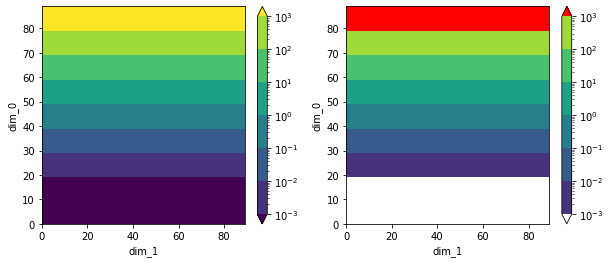

In [31]:
# CORRECT: DataArray.plot.contourf with limits on LogNorm
fig, axs = plt.subplots(1,2, figsize=(10,4))
da.plot.contourf(ax=axs[0], levels=levs2, cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))
da.plot.contourf(ax=axs[1], levels=levs2, cmap=cmap2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))  

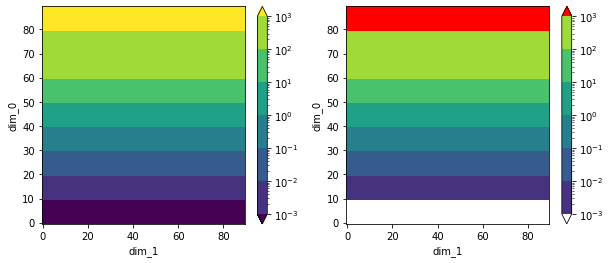

In [29]:
# BAD: DataArray.plot => Inconsistent with contourf
fig, axs = plt.subplots(1,2, figsize=(10,4))
da.plot(ax=axs[0], levels=levs2, cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))
da.plot(ax=axs[1], levels=levs2, cmap=cmap2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]))

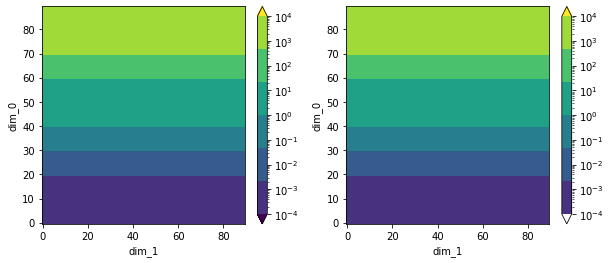

In [9]:
# BAD: DataArray.plot without limits on LogNorm => Inconsistent colors..
fig, axs = plt.subplots(1,2, figsize=(10,4))
da.plot(ax=axs[0], levels=levs2, cmap=cmap, norm=matplotlib.colors.LogNorm())
da.plot(ax=axs[1], levels=levs2, cmap=cmap2, norm=matplotlib.colors.LogNorm())

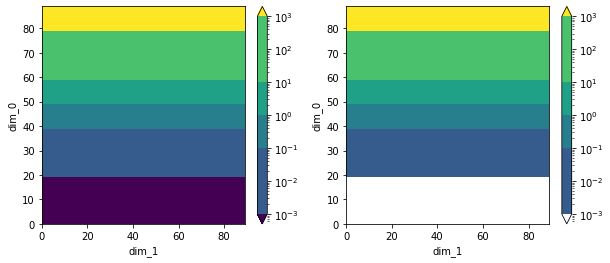

In [10]:
# BAD: DataArray.plot.contourf without limits on LogNorm => Inconsistent colors..
fig, axs = plt.subplots(1,2, figsize=(10,4))
da.plot.contourf(ax=axs[0], levels=levs2, cmap=cmap, norm=matplotlib.colors.LogNorm())
da.plot.contourf(ax=axs[1], levels=levs2, cmap=cmap2, norm=matplotlib.colors.LogNorm())

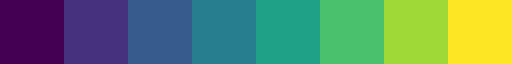

In [32]:
cmap

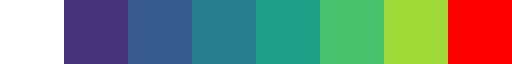

In [33]:
cmap2

In [34]:
cmap2.N

8

# Common colorbar and extend with matplotlib +3.3

http://omz-software.com/pythonista/matplotlib/examples/api/colorbar_only.html


In [47]:
levs1, levs2

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
        1.e+04]),
 array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]))

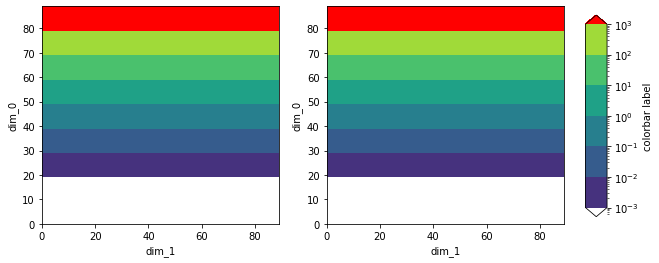

In [55]:
# http://omz-software.com/pythonista/matplotlib/examples/api/colorbar_only.html
    
fig, axs = plt.subplots(1,2, figsize=(10,4))
da.plot.contourf(ax=axs[0], levels=levs2, cmap=cmap2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]), add_colorbar=False)
da.plot.contourf(ax=axs[1], levels=levs2, cmap=cmap2, norm=matplotlib.colors.LogNorm(vmin=levs2[0], vmax=levs2[-1]), add_colorbar=False)  

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
# Doesn't do the extend (deprecated matplotlib +3.3)
# cb = fig.colorbar(p1, cax=cbar_ax, extend='both')

cb = matplotlib.colorbar.ColorbarBase(ax=cbar_ax, 
    cmap=cmap2,
    norm=matplotlib.colors.LogNorm(vmin=levs1[0], vmax=levs1[-1]),
    # to use 'extend', you must
    # specify two extra boundaries:
    boundaries=levs1, #[0]+bounds+[13],
    extend='both',
#     ticks=levs2, # optional
    spacing='proportional',
)

cb.set_label('colorbar label')